> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [171]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [172]:
# Load the data 
df_tmdb_dataset = pd.read_csv("tmdb-movies.csv",sep=',')
df_tmdb_dataset.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Shape of the dataset**

In [173]:
df_tmdb_dataset.shape

(10866, 21)

**Summary of the dataset**

In [174]:
df_tmdb_dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Information of the dataset**

In [175]:
df_tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [176]:
# Check the total Null values for each column
df_tmdb_dataset.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

**1. Drop unnecessary columns from the dataset 'imdb_id','tagline','keywords','homepage','cast','overview','budget_adj','revenue_adj**

In [177]:
df_tmdb_dataset.drop(['imdb_id','tagline','keywords','homepage','cast','overview','budget_adj','revenue_adj'],axis=1,inplace=True)
    

In [178]:
df_tmdb_dataset.head(5)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [179]:
# Check the total Null values in each column
df_tmdb_dataset.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [180]:
df_tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


**2. Replace Null values with mean**

In [181]:
df_tmdb_dataset.fillna(df_tmdb_dataset.mean(),inplace=True)

**3. Drop Duplicates from the dataset**

In [182]:
df_tmdb_dataset.dropna(inplace=True)
df_tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 13 columns):
id                      9807 non-null int64
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
release_date            9807 non-null object
vote_count              9807 non-null int64
vote_average            9807 non-null float64
release_year            9807 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2646f748>,
      dtype=object)

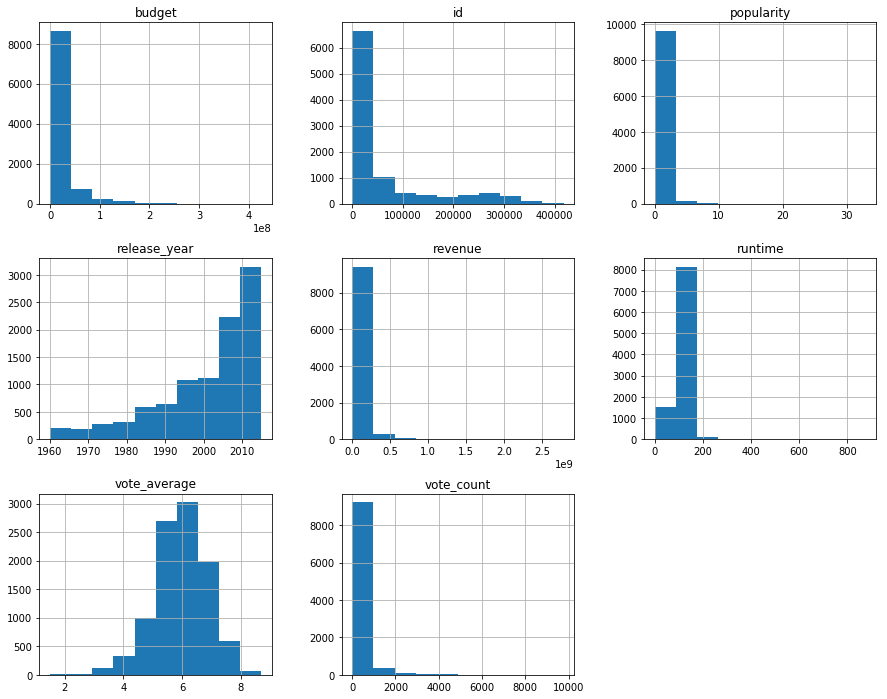

In [183]:
# View each column in hitogram
df_tmdb_dataset.hist(figsize=(15,12))

In [184]:
## Common Function to find Minimum value of column
def find_min(column):
    low= df_tmdb_dataset[column].idxmin()
    lowest_value_dataset=pd.DataFrame(df_tmdb_dataset.loc[low])
    
    return lowest_value_dataset

In [185]:
## Common Function to find Maximum value of column
def find_max(column):
    high= df_tmdb_dataset[column].idxmax()
    highest_value_dataset=pd.DataFrame(df_tmdb_dataset.loc[high])
    
    return highest_value_dataset

### Research Question 1 : Which movie is the highest budget?

In [186]:
find_max('budget')

,2244
id,46528
popularity,0.25054
budget,425000000
revenue,11087569
original_title,The Warrior's Way
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
production_companies,Boram Entertainment Inc.
release_date,12/2/10


### Research Question 2  : Which movie is the lowest budget?

In [187]:
find_min('budget')

,30
id,280996
popularity,3.92733
budget,0
revenue,29355203
original_title,Mr. Holmes
director,Bill Condon
runtime,103
genres,Mystery|Drama
production_companies,BBC Films|See-Saw Films|FilmNation Entertainme...
release_date,6/19/15


### Research Question 3  : Which movie is the longest runtime?

In [188]:
find_max('runtime')

,4041
id,150004
popularity,0.469332
budget,0
revenue,0
original_title,Taken
director,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...
runtime,877
genres,Science Fiction
production_companies,DreamWorks
release_date,12/2/02


### Research Question 4  : Which movie is the shortest runtime?

In [189]:
find_min('runtime')

,92
id,370687
popularity,1.87604
budget,0
revenue,0
original_title,Mythica: The Necromancer
director,A. Todd Smith
runtime,0
genres,Fantasy|Action|Adventure
production_companies,Arrowstorm Entertainment|Camera 40 Productions...
release_date,12/19/15


### Research Question 5  : Which year the first movie is released?

In [190]:
release_date_first=df_tmdb_dataset['release_date'].min()
print('First movie release date',release_date_first)

First movie release date 1/1/00


### Research Question 6  : Which year the last movie is released?

In [191]:
release_date_last=df_tmdb_dataset['release_date'].max()
print('Last movie release date',release_date_last)

Last movie release date 9/9/97


### Research Question 7  : Which movie is the highest revenue?

In [192]:
find_max('revenue')

,1386
id,19995
popularity,9.43277
budget,237000000
revenue,2781505847
original_title,Avatar
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,12/10/09


### Research Question 8  : Which movie is the lowest revenue?

In [193]:
find_min('revenue')

,48
id,265208
popularity,2.93234
budget,30000000
revenue,0
original_title,Wild Card
director,Simon West
runtime,92
genres,Thriller|Crime|Drama
production_companies,Current Entertainment|Lionsgate|Sierra / Affin...
release_date,1/14/15


### Research Question 9  : What is the average revenue of all the movies?

In [194]:
average_revenue=df_tmdb_dataset['revenue'].mean()
print('Average Revenue :' , average_revenue)

Average Revenue : 44073453.61639645


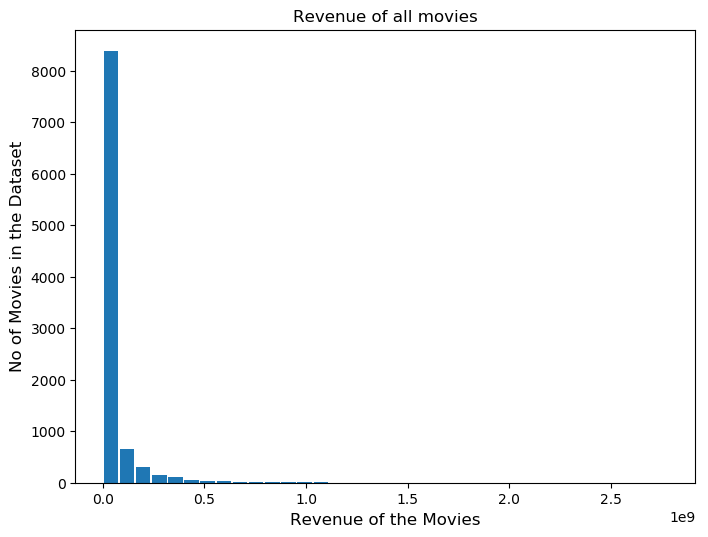

In [195]:
plt.figure(figsize=(8,6), dpi = 100)

#X-axis label 
plt.xlabel('Revenue of the Movies', fontsize = 12)

#Y-axis label
plt.ylabel('No of Movies in the Dataset', fontsize=12)

#Graph name
plt.title('Revenue of all movies', fontsize=12)

#Histogram plot
plt.hist(df_tmdb_dataset['revenue'], rwidth = 0.9, bins =35)

#Display the plot
plt.show()

### Research Question 10  : What the average runtime of all the movies?

In [196]:
average_runtime=df_tmdb_dataset['runtime'].mean()
print('Average Runtime :' ,average_runtime)

Average Runtime : 102.74324462118895


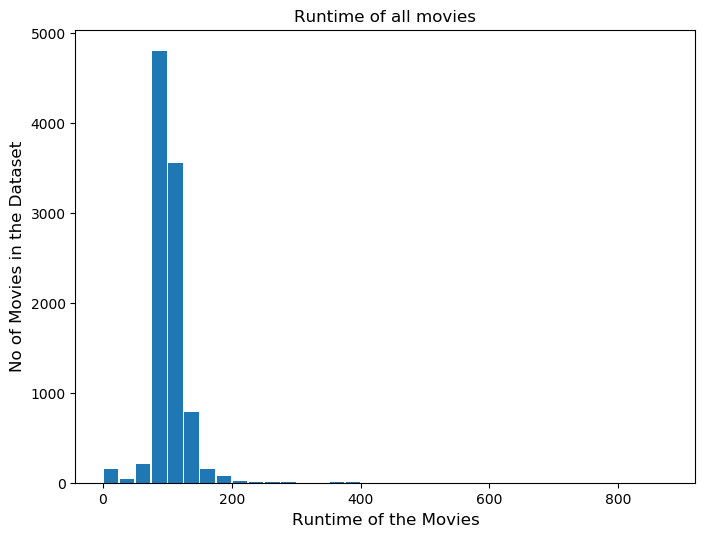

In [197]:
plt.figure(figsize=(8,6), dpi = 100)

#X-axis label 
plt.xlabel('Runtime of the Movies', fontsize = 12)

#Y-axis label
plt.ylabel('No of Movies in the Dataset', fontsize=12)

#Graph name
plt.title('Runtime of all movies', fontsize=12)

#Histogram plot
plt.hist(df_tmdb_dataset['runtime'], rwidth = 0.9, bins =35)

#Display the plot
plt.show()

### Research Question 11  : What is the average rating of all the movies?

In [198]:
average_rating=df_tmdb_dataset['vote_count'].mean()
print('Average Rating :' ,average_rating)

Average Rating : 238.60946262873458


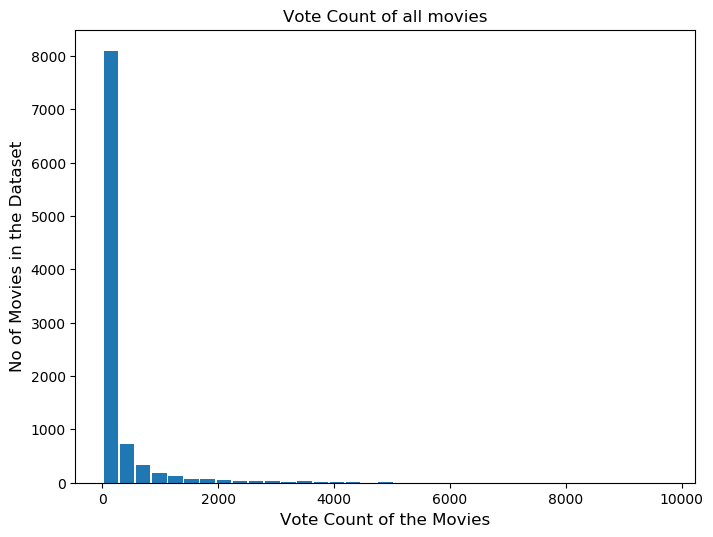

In [199]:
plt.figure(figsize=(8,6), dpi = 100)

#X-axis label 
plt.xlabel('Vote Count of the Movies', fontsize = 12)

#Y-axis label
plt.ylabel('No of Movies in the Dataset', fontsize=12)

#Graph name
plt.title('Vote Count of all movies', fontsize=12)

#Histogram plot
plt.hist(df_tmdb_dataset['vote_count'], rwidth = 0.9, bins =35)

#Display the plot
plt.show()

### Research Question 12  : Which movie receive the highest rating?

In [200]:
highest_rating=df_tmdb_dataset['vote_count'].max()
print('Highest Rating :' ,highest_rating)

Highest Rating : 9767


### Research Question 13  : Which movie receive the lowest rating?

In [201]:
lowest_rating=df_tmdb_dataset['vote_count'].min()
print('Lowest Rating :' ,lowest_rating)

Lowest Rating : 10


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!